In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_i = np.linspace(0,1,11)

    
x = np.linspace(0,1,1001)
x_m = 0.5*(x[1:] + x[:-1]).reshape(-1,1)
dx = (x[1:] - x[:-1]).reshape(-1)
def theta(y):
    t = y.copy()
    t[y>0] = 1
    t[y==0] = 0.5
    t[y<0] = 0
    return t 
def integral(x_i):
    F = lambda x_m : (theta(x_i-x_m)/x_i.size).sum(axis=1)#sum over x_i
    return sum(F(x_m)**2*dx)
def derivative(x_i,at):
    F = (theta(x_i-at)/x_i.size).sum(axis=0)
    return 2 * F/x_i.size

0.31818245868354167
0.12396694214876035


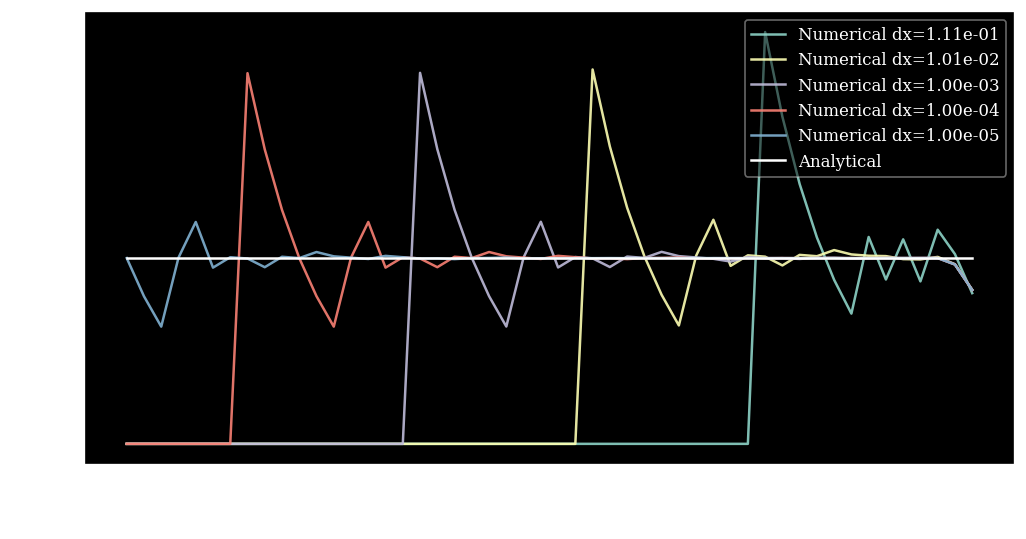

In [7]:
where = 3
analytical =derivative(x_i,x_i[where])
print(integral(x_i))
print(analytical)


es = 10**-(np.linspace(0.1,5,50))
def plot(N):
    num_der = []
    for e in es:
        inputs = x_i.copy()
        inputs[where] = inputs[where] + e/2
        Integral_p = integral(inputs)
        inputs = x_i.copy()
        inputs[where] = inputs[where] - e/2
        Integral_n = integral(inputs)
        num_der.append((Integral_p - Integral_n)/e)
    ax.plot(es,num_der,label='Numerical dx={:.2e}'.format(1/(N-1)),alpha=0.9)
    return num_der

fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=120)

for N in np.round(10**np.linspace(1,5,5)):
    x = np.linspace(0,1,N)
    x_m = 0.5*(x[1:] + x[:-1]).reshape(-1,1)
    dx = (x[1:] - x[:-1]).reshape(-1)
    plot(N)
ax.plot([es[0],es[-1]],[analytical,analytical],label='Analytical',c='white')
ax.set_xscale('log')
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel("Derivative Value")
ax.legend(framealpha=0.5)

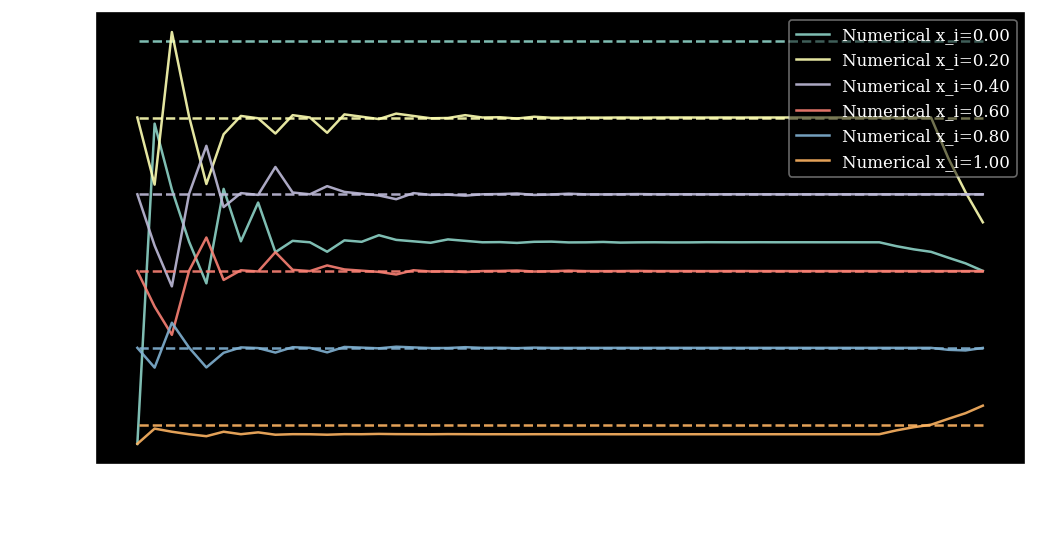

In [8]:
es = 10**-(np.linspace(0.1,5,50))
def plot(N,where):
    num_der = []
    for e in es:
        inputs = x_i.copy()
        inputs[where] = inputs[where] + e/2
        Integral_p = integral(inputs)
        inputs = x_i.copy()
        inputs[where] = inputs[where] - e/2
        Integral_n = integral(inputs)
        num_der.append((Integral_p - Integral_n)/e)
    ax.plot(es,num_der,label='Numerical x_i={:.2f}'.format(x_i[where]),alpha=0.9)
    return num_der

fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=120)

for i,where in enumerate(np.arange(0,11,2)):
    analytical =derivative(x_i,x_i[where])
    x = np.linspace(0,1,N)
    x_m = 0.5*(x[1:] + x[:-1]).reshape(-1,1)
    dx = (x[1:] - x[:-1]).reshape(-1)
    plot(N,where)
    ax.plot([es[0],es[-1]],[analytical,analytical],alpha=0.9,
            c=f'C{i}',ls='--')
ax.set_xscale('log')
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel("Derivative Value")
ax.legend(framealpha=0.5)